# Ejemplo básico de ML

Datos: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

- PassengerId: Un identificador único para cada pasajero. Es simplemente un número que asigna una identificación única a cada persona en el dataset.

- Survived: Indica si el pasajero sobrevivió (1) o no (0).

- Pclass: La clase del pasajero. Es un número que indica la clase del boleto que el pasajero compró:

    1: Primera clase
  
    2: Segunda clase
  
    3: Tercera clase
  
- Name: El nombre del pasajero. Suele estar en formato de "Apellido, Título. Nombre".

- Sex: El sexo del pasajero (male para hombres, female para mujeres).

- Age: La edad del pasajero en años. Puede contener valores nulos si la edad no está disponible.

- SibSp: Número de hermanos o cónyuges del pasajero a bordo del Titanic. Indica cuántos hermanos, hermanas o esposos/esposas viajaban con el pasajero.

- Parch: Número de padres o hijos del pasajero a bordo del Titanic. Indica cuántos padres o hijos viajaban con el pasajero.

- Ticket: El número del boleto del pasajero. Es una combinación de letras y números que identifica el boleto.

- Fare: La tarifa del pasajero. Indica cuánto pagó el pasajero por el boleto.

- Cabin: El número de cabina del pasajero. Puede contener valores nulos si la información no está disponible.

- Embarked: El puerto de embarque del pasajero. Indica en qué puerto se embarcó el pasajero:

    C: Cherburgo
  
    Q: Queenstown
  
    S: Southampton

In [1]:
# Librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Paso 1: Leer un dataset con Pandas
## Cargar el dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

## Convertir a DataFrame de pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Primer vistazo a los datos:")
df.head()

Primer vistazo a los datos:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Paso 1: Leer un dataset con Pandas
data_path = 'titanic.csv'  # Cambia esto por la ruta a tu archivo
df = pd.read_csv(data_path)
print("Primer vistazo a los datos:")
df.head()

Primer vistazo a los datos:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Paso 2: Explorar las variables
## Muestra información básica sobre los tipos de datos y valores faltantes
print("Información del DataFrame:")
print(df.info())

## Resumen estadístico de las variables numéricas
print("Resumen estadístico:")
print(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Resumen estadístico:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699

In [4]:
# Paso 3: Defición de la variable objetivo
target_column = 'Survived'

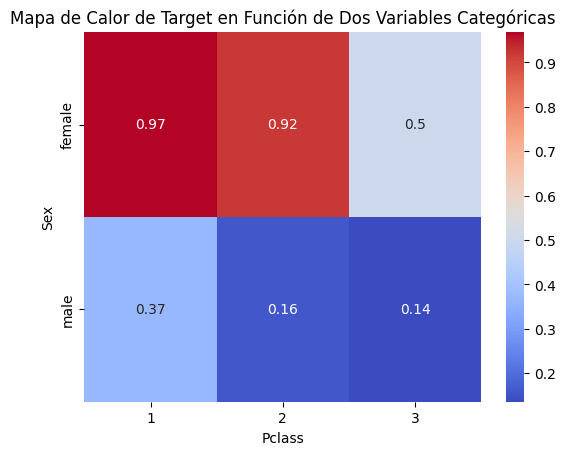

In [5]:
# Paso 4: Relación entre las variables predictoras y la objetivo

## Heatmaps para variables numéricas discretas / categóricas

def plot_heatmap(cat_feature1, cat_feature2):
    pivot_table = df.pivot_table(index=cat_feature1, columns=cat_feature2, values=target_column, aggfunc=np.mean)
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title('Mapa de Calor de Target en Función de Dos Variables Categóricas')
    plt.show()

cat_feature1 = 'Sex'
cat_feature2 = 'Pclass'
plot_heatmap(cat_feature1, cat_feature2)

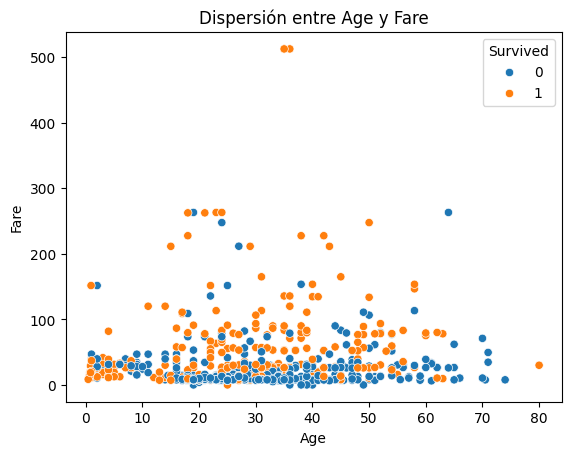

In [8]:
## Gráficos de dispersión para variables numéricas 

def plot_dispersion(num_feature1, num_feature2):
    sns.scatterplot(data=df, x=num_feature1, y=num_feature2, hue=target_column)
    plt.title(f'Dispersión entre {num_feature1} y {num_feature2}')
    plt.show()

num_feature1 = 'Age'
num_feature2 = 'Fare'

plot_dispersion(num_feature1, num_feature2)

In [7]:
# Paso 5: Limpieza básica del dataset
## Eliminación de columnas sin capacidad predictiva
df_clean = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

## Eliminación de filas con valores faltantes
df_clean = df_clean.dropna()

print("Datos después de limpieza:")
print(df_clean.info())

Datos después de limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB
None


In [9]:
# Paso 6: Transformacion del dataset

## Aplicar One-Hot Encoding
categorical_cols = ['Sex', 'Embarked']

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [10]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [11]:
# Paso 7: Separar en conjuntos de entrenamiento y prueba
X = df_encoded.drop(target_column, axis = 1)
y = df_encoded[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
print(f'Dimensiones del conjunto de datos de entrenamiento de las variables predictoras: {X_train.shape}')
print(f'Dimensiones del conjunto de datos de entrenamiento del target: {y_train.shape}')
print(f'Dimensiones del conjunto de datos de test de las variables predictoras: {X_test.shape}')
print(f'Dimensiones del conjunto de datos de test del target: {y_test.shape}')

Dimensiones del conjunto de datos de entrenamiento de las variables predictoras: (569, 8)
Dimensiones del conjunto de datos de entrenamiento del target: (569,)
Dimensiones del conjunto de datos de test de las variables predictoras: (143, 8)
Dimensiones del conjunto de datos de test del target: (143,)


In [20]:
# Paso 8: Entrenar un modelo de clasificación con un árbol de decisión
classifier = DecisionTreeClassifier(min_samples_leaf=50, random_state=42)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=42)

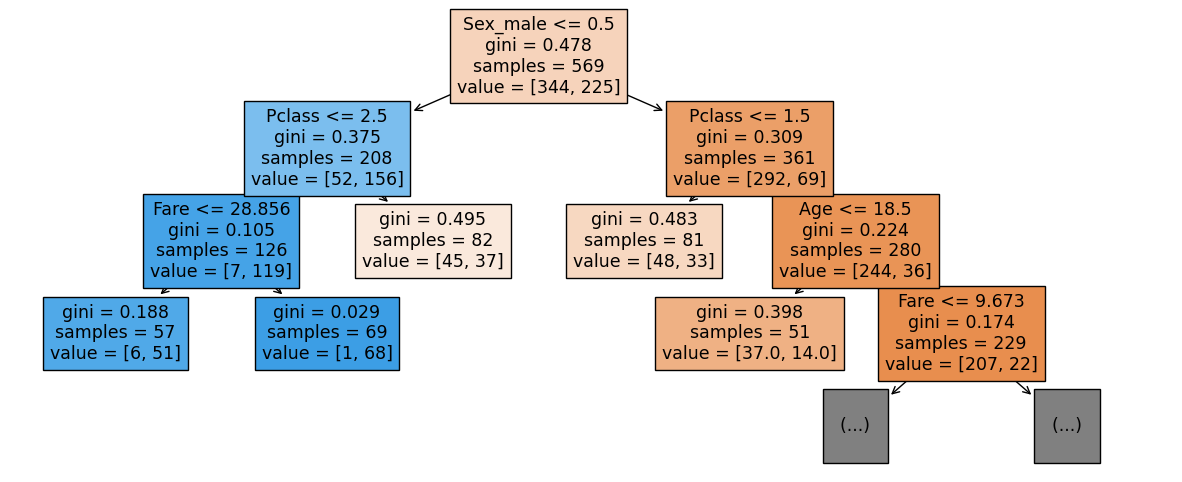

In [21]:
# Paso 9: Interpretación del modelo
from sklearn.tree import plot_tree
## Árbol de clasificación
plt.figure(figsize=(15, 6))
plot_tree(classifier, max_depth = 3, filled = True, feature_names = X_train.columns.values.tolist())
plt.show()

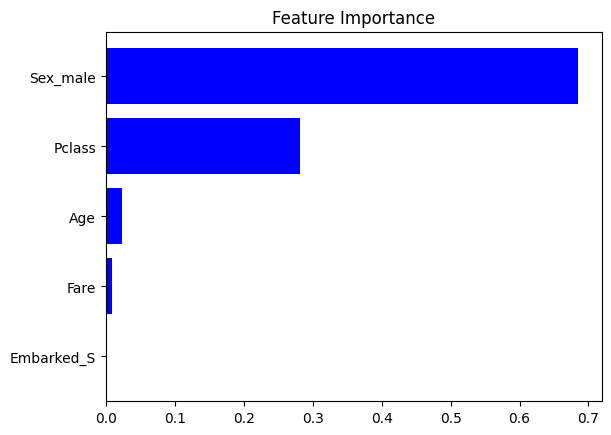

In [22]:
## Importancia de las variables
def get_feature_importance(model, n_features):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(n_features), feature_importance[sorted_idx][-n_features:], align='center', color = 'blue')
    plt.yticks(range(n_features), np.array(model.feature_names_in_)[sorted_idx][-n_features:])
    plt.title('Feature Importance')
    plt.show()

get_feature_importance(classifier, 5)

In [23]:
# Paso 10: Evaluación del modelo

predictions_test = classifier.predict(X_test)
y_test
## Accuracy
accuracy = accuracy_score(y_test, predictions_test)
print(f'Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}')

Exactitud del modelo en el conjunto de prueba: 0.75


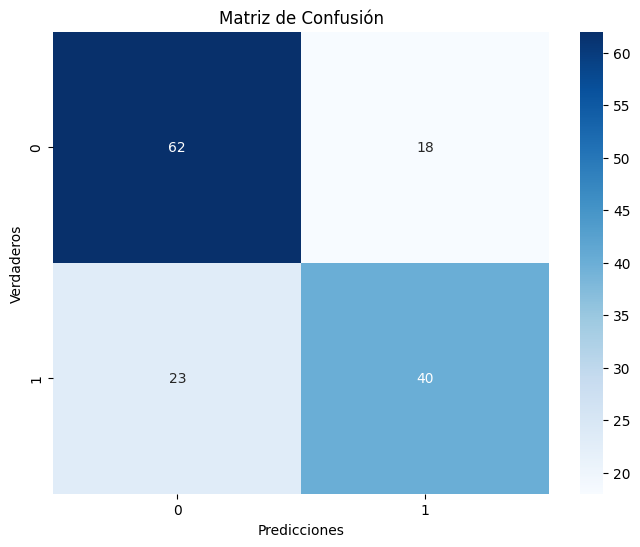

In [14]:
cm = confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

In [15]:
recall = recall_score(y_test, predictions_test)
print(f'Recall del modelo en el conjunto de prueba: {recall:.2f}')

Recall del modelo en el conjunto de prueba: 0.63


In [16]:
precision = precision_score(y_test, predictions_test)
print(f'Precision del modelo en el conjunto de prueba: {precision:.2f}')

Precision del modelo en el conjunto de prueba: 0.69


In [17]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [22]:
# Paso 11: Utilizar el modelo para predecir una fila con valores introducidos a mano

## Cambia estos valores de ejemplo por los valores que quieras para una nueva predicción
sample_data = np.array([[2,20,1,2,27,True,True,False]])  
predicted_class = classifier.predict(sample_data)
print("Clase predicha para los datos ingresados:")
print(predicted_class)



Clase predicha para los datos ingresados:
[0]


# Avanzado

In [17]:
# Comparamos los resultados con los de otros algoritmos

## Algoritmos de clasificación habituales:
### sklearn.linear_model.LogisticRegression
### sklearn.svm.SVC
### sklearn.neighbors.KNeighborsClassifier
### sklearn.tree.DecisionTreeClassifier
### sklearn.ensemble.GradientBoostingClassifier
### sklearn.ensemble.RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

classifier_xgb = GradientBoostingClassifier(random_state=42)

classifier_xgb.fit(X_train, y_train)

predictions_xgb_test = classifier_xgb.predict(X_test)

## Accuracy
accuracy = accuracy_score(y_test, predictions_xgb_test)
print(f'Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}')

Exactitud del modelo en el conjunto de prueba: 0.76


In [24]:
# ¿Estoy obteniendo sobre-ajuste?

## test: 0.71 


predictions_train = classifier.predict(X_train)

## Accuracy
accuracy = accuracy_score(y_train, predictions_train)
print(f'Exactitud del modelo en el conjunto de entrenamiento: {accuracy:.2f}')



Exactitud del modelo en el conjunto de entrenamiento: 0.80


In [26]:
# Investigamos los hiperparámetros del/los modelo/s seleccionado/s y tratamos de modificarlos 
# para obtener un mayor ajuste o menor sobre-ajuste (en caso de tenerlo)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_

Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


In [28]:
# Análisis de los errores del modelo

## ¿Cómo son las personas que mi modelo predice que sobrevivirán y realmente no sobreviven?
false_positive = X_test[(y_test == 0) & (predictions_test == 1)]

false_positive.head(15)




,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
297,1,2.0,1,2,151.55,False,False,True
854,2,44.0,1,0,26.00,False,False,True


In [29]:
## ¿Cómo son las personas que sobrevivieron y mi modelo no captura?
false_negative = X_test[(y_test == 1) & (predictions_test == 0)]

false_negative.head(15)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
550,1,17.0,0,2,110.8833,True,False,False
279,3,35.0,1,1,20.2500,False,False,True
554,3,22.0,0,0,7.7750,False,False,True
509,3,26.0,0,0,56.4958,True,False,True
875,3,15.0,0,0,7.2250,False,False,False
445,1,4.0,0,2,81.8583,True,False,True
762,3,20.0,0,0,7.2292,True,False,False
679,1,36.0,0,1,512.3292,True,False,False
261,3,3.0,4,2,31.3875,True,False,True
414,3,44.0,0,0,7.9250,True,False,True
